In [13]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D,\
                                    MaxPooling2D, Input, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from keras.utils import plot_model
from tensorflow.keras import backend as K

In [26]:
test_img = Image.open('../mfcc_specs/Electronic/Electronic_100497.png')

In [29]:
test_img = test_img.convert('L')

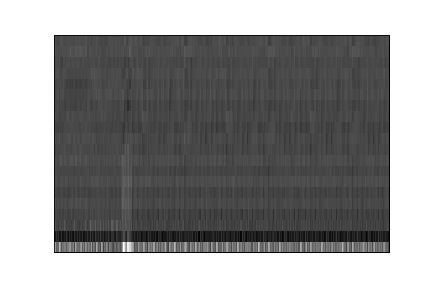

In [38]:
test_img

In [45]:
test_img.mode

'L'

In [39]:
test_array = np.asarray(test_img)

In [43]:
test_array.shape

(288, 432)

In [48]:
test_img2 = Image.open('../mfcc_specs/Electronic/Electronic_100522.png')

In [49]:
test_img2 = test_img.convert('L')

In [50]:
test_array2 = np.asarray(test_img)

In [60]:
test_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [65]:
np.stack([test_array, test_array2]).shape

(2, 288, 432)

In [19]:
# https://machinelearningmastery.com/keras-functional-api-deep-learning/

# convolutional img recognition
visible_1 = Input(shape=(216,144,1), name='img_input')

conv_1 = Conv2D(32,
                activation='relu',
                kernel_size=(3,3),
                name='conv_1')(visible_1)
pool_1 = MaxPooling2D(name='pool_1')(conv_1)

conv_2 = Conv2D(64,
                activation='relu',
                kernel_size=(3,3),
                name='conv_2')(pool_1)
pool_2 = MaxPooling2D(name='pool_2')(conv_2)

flat_1 = Flatten(name='flat_1')(pool_2)

# dense input
visible_2 = Input(shape=(140,1), name='statistics_input')

dense_1 = Dense(32,
                activation='relu',
                name='stats_interpretation')(visible_2)
flat_2 = Flatten(name='flat_2')(dense_1)

merge = concatenate([flat_1, flat_2], name='merge')

hidden_1 = Dense(10, activation='relu', name='interpretation_1')(merge)
hidden_2 = Dense(10, activation='relu', name='interpretation_2')(hidden_1)
output = Dense(8, activation='softmax', name='output')(hidden_2)

model = Model(inputs=[visible_1, visible_2], outputs=output)

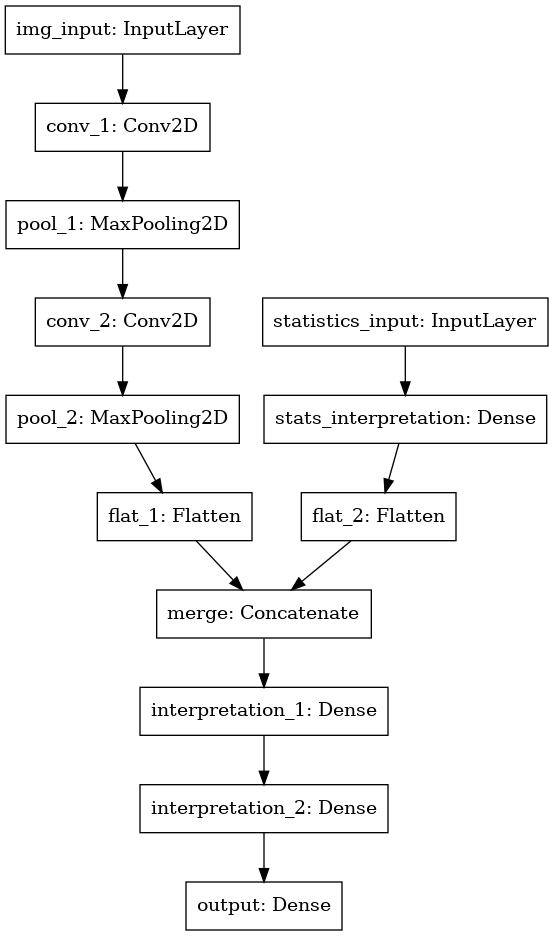

In [20]:
plot_model(model, to_file='../images/multi_input_layout.png')